In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dps = pd.read_csv('..\data\s4_dps.csv')
heals = pd.read_csv('..\data\s4_heals.csv')
tanks = pd.read_csv('..\data\s4_tank.csv')

In [3]:
dps.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
0,Genji,All,2.50,3.45,49.28,18.30,5.06,64,7292,NaN,8.09,NaN,Damage
1,Genji,Bronze,2.37,1.15,44.89,16.33,5.34,70,6572,NaN,8.15,NaN,Damage
2,Genji,Silver,2.53,1.40,47.39,16.91,5.26,69,6777,NaN,8.16,NaN,Damage
3,Genji,Gold,2.50,2.21,48.29,17.63,5.31,68,7044,NaN,8.17,NaN,Damage
4,Genji,Platinum,2.51,3.53,49.10,18.32,5.21,66,7291,NaN,8.14,NaN,Damage


In [4]:
x = dps[["Eliminations / 10min", "Damage / 10min"]]
y = dps["Win Rate, %"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Win Rate, %   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     8.098
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           0.000480
Time:                        15:35:15   Log-Likelihood:                -339.32
No. Observations:                 136   AIC:                             684.6
Df Residuals:                     133   BIC:                             693.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.9001      3.112     11.214      0.000      28.744      41.056
Eliminations / 10min     0.6359      0.229      2.776      0.006       0.183       1.089
Damage / 10min         9.07e-05      0.000      0.333      0.739      -0.000       0.001
==============================================================================
Omnibus:                        4.569   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.642
Skew:                          -0.440   Prob(JB):                       0.0982
Kurtosis:                       2.787   Cond. No.                     9.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the 'Eliminations / 10min' variable seems to be statistically significant (p-value = 0.006), while the 'Damage / 10min' variable is not statistically significant (p-value = 0.739). The overall model's R-squared is relatively low, indicating that the model may not explain a large proportion of the variability in the 'Win Rate, %

In [5]:
x = dps[["Eliminations / 10min", "Objective Kills / 10min"]]
y = dps["Win Rate, %"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Win Rate, %   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     11.73
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.03e-05
Time:                        15:35:15   Log-Likelihood:                -336.08
No. Observations:                 136   AIC:                             678.2
Df Residuals:                     133   BIC:                             686.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.6390      3.020     11.140      0.000      27.666      39.612
Eliminations / 10min        0.9764      0.202      4.841      0.000       0.577       1.375
Objective Kills / 10min    -0.6399      0.249     -2.568      0.011      -1.133      -0.147
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.835
Skew:                          -0.092   Prob(JB):                        0.659
Kurtosis:                       2.663   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, both 'Eliminations / 10min' and 'Objective Kills / 10min' variables appear to be statistically significant (p-values < 0.05). The F-statistic and its associated probability suggest that the overall model is providing valuable information. The R-squared and Adjusted R-squared values indicate a moderate level of explanatory power.

In [6]:
x = dps[["KDA Ratio", "Eliminations / 10min"]]
y = dps["Win Rate, %"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Win Rate, %   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     8.064
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           0.000495
Time:                        15:35:15   Log-Likelihood:                -339.35
No. Observations:                 136   AIC:                             684.7
Df Residuals:                     133   BIC:                             693.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.9865      3.291     10.631      0.000      28.477      41.496
KDA Ratio               -0.0909      0.403     -0.225      0.822      -0.888       0.707
Eliminations / 10min     0.6866      0.171      4.010      0.000       0.348       1.025
==============================================================================
Omnibus:                        4.029   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.085
Skew:                          -0.407   Prob(JB):                        0.130
Kurtosis:                       2.757   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
x = heals[["Healing / 10min", "Objective Time / 10min"]]
y = heals["Win Rate, %"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Win Rate, %   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.430
Date:                Thu, 07 Dec 2023   Prob (F-statistic):             0.0380
Time:                        15:35:15   Log-Likelihood:                -200.65
No. Observations:                  72   AIC:                             407.3
Df Residuals:                      69   BIC:                             414.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     49.0443      4.729     10.372      0.000      39.611      58.478
Healing / 10min           -0.0006      0.000     -1.340      0.185      -0.002       0.000
Objective Time / 10min     0.0543      0.028      1.919      0.059      -0.002       0.111
==============================================================================
Omnibus:                       13.889   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.671
Skew:                          -0.934   Prob(JB):                     0.000395
Kurtosis:                       4.317   Cond. No.                     8.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


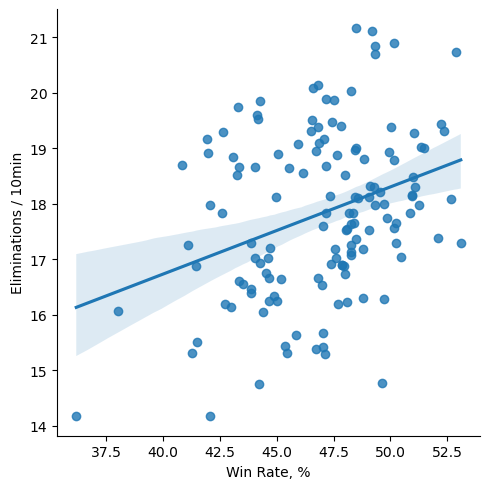

In [8]:
sns.lmplot(x="Win Rate, %", y="Eliminations / 10min", data=dps)
plt.show()

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


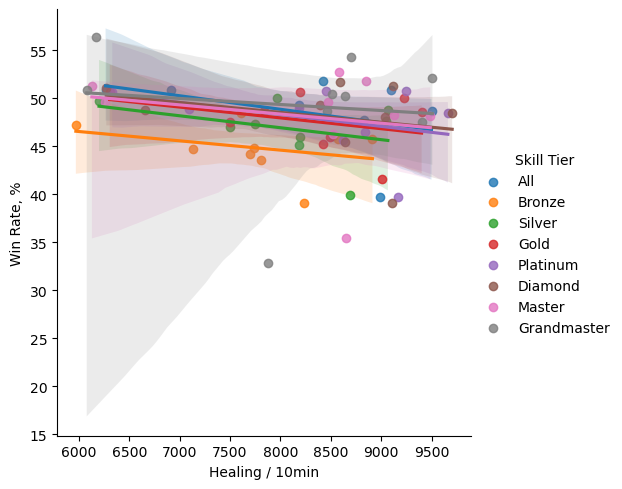

In [9]:
sns.lmplot(y="Win Rate, %", x="Healing / 10min", data=heals, hue='Skill Tier')
plt.show()

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


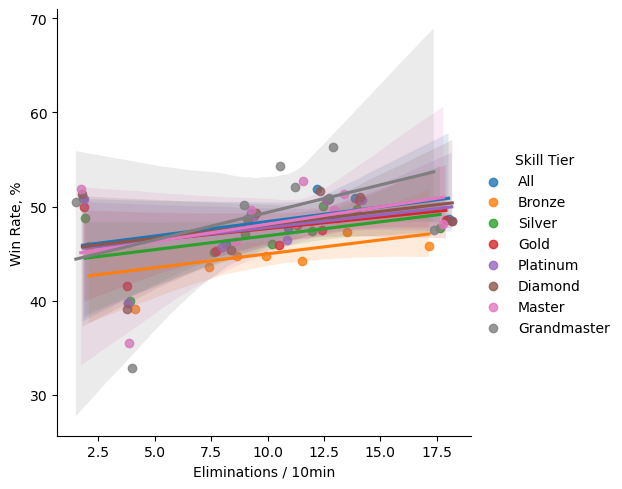

In [15]:
sns.lmplot(y="Win Rate, %", x="Eliminations / 10min", data=heals, hue='Skill Tier')
plt.show()

In [10]:
x = dps[["Eliminations / 10min", "Deaths / 10min"]]
y = dps["Win Rate, %"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Win Rate, %   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     10.00
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           8.98e-05
Time:                        15:35:45   Log-Likelihood:                -337.61
No. Observations:                 136   AIC:                             681.2
Df Residuals:                     133   BIC:                             689.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.9493      3.775     10.316      0.000      31.482      46.417
Eliminations / 10min     0.7711      0.175      4.407      0.000       0.425       1.117
Deaths / 10min          -0.7343      0.392     -1.873      0.063      -1.510       0.041
==============================================================================
Omnibus:                        5.826   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.883
Skew:                          -0.508   Prob(JB):                       0.0528
Kurtosis:                       2.913   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""